<p style="text-align: center;"> Y Py?</p>

<img src="images/zendesk.jpg" width=500>
### Chris Hausler
### Data Engineer @ Zendesk



<br><br>
 <center><img src="images/anaconda_logo_web.png"/><br>
 <b><a href="http://continuum.io/downloads">http://continuum.io/downloads</a></b><br/><br/><br>
Completely free enterprise-ready Python distribution for large-scale<br><br> data processing, predictive analytics, and scientific computing

</center>
  
  





#What I want from my data stack
* Munging
* Plotting
* Learning
* Productionising
* Collaborating

#Munging

*And introduction to Pandas*

###Pandas

In [2]:
import pandas as pd

###Data Frames

In [15]:
ages = pd.DataFrame([['John', 25],
                     ['Mary', 9],
                     ['Radek', 16],
                     ['Mia', 64],
                     ['Geroge', 4],
                     ['Katrin', 21]])
ages

,0,1
0,John,25
1,Mary,9
2,Radek,16
3,Mia,64
4,Geroge,4
5,Katrin,21


###Column Names and Index

In [17]:
ages.columns = ['Name', 'Age']
ages.set_index('Name', inplace=True)
ages

,Age
Name,
John,25
Mary,9
Radek,16
Mia,64
Geroge,4
Katrin,21


###Using the Index

In [24]:
ages.ix[['John', 'Mary']]

,Age
Name,
John,25
Mary,9


In [22]:
ages.ix[['John', 'Mary', 'Thomas']]

,Age
Name,
John,25
Mary,9
Thomas,NaN


### Basic Arithmetic

In [18]:
ages * 2

,Age
Name,
John,50
Mary,18
Radek,32
Mia,128
Geroge,8
Katrin,42


###Another DataFrame

In [26]:
genders = pd.DataFrame(['male', 'female', 'male', 'female'],
                       index=['John', 'Mary', 'Alberto', 'Karyn'],
                       columns=['Gender'])
genders

,Gender
John,male
Mary,female
Alberto,male
Karyn,female


### Joins

In [27]:
people = genders.join(ages, how='left')
people

,Gender,Age
John,male,25
Mary,female,9
Alberto,male,NaN
Karyn,female,NaN


###Dealing with Missing Values

In [46]:
people

,Gender,Age
John,male,5
Mary,female,3
Alberto,male,NaN
Karyn,female,NaN


####1. Get rid of them

In [39]:
people.dropna()

,Gender,Age
John,male,5
Mary,female,3


####2. Fill them with something

In [43]:
people.fillna(people.Age.mean())

,Gender,Age
John,male,5
Mary,female,3
Alberto,male,4
Karyn,female,4


####3. Use a function like forward fill

In [45]:
people.fillna(method='ffill')

,Gender,Age
John,male,5
Mary,female,3
Alberto,male,3
Karyn,female,3


###Loading Data
* read_csv
* read_excel
* read_hdf
* read_sql
* read_json
* read_clipboard
* ....

###Get some real data

In [121]:
data = pd.read_csv('pedestrian_count.csv', index_col=0, parse_dates=[0])
data.head()

,Webb Bridge,Princes Bridge,Sandridge Bridge,Flagstaff Station,Southern Cross,Flinders St Underpass
datetime,,,,,,
2012-01-01 00:00:00,325,4171,479,157,325,3726
2012-01-01 01:00:00,169,2843,1011,105,246,3082
2012-01-01 02:00:00,52,2153,1346,39,131,2784
2012-01-01 03:00:00,58,967,1034,34,135,1915
2012-01-01 04:00:00,18,404,532,26,56,959


### Basic Info

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24840 entries, 2012-01-01 00:00:00 to 2014-10-31 23:00:00
Data columns (total 6 columns):
Webb Bridge               24839 non-null float64
Princes Bridge            24839 non-null float64
Sandridge Bridge          24839 non-null float64
Flagstaff Station         24838 non-null float64
Southern Cross            24838 non-null float64
Flinders St Underpass     24839 non-null float64
dtypes: float64(6)
memory usage: 1.3 MB


###Descriptive stats

In [112]:
data.describe()

,Webb Bridge,Princes Bridge,Sandridge Bridge,Flagstaff Station,Southern Cross,Flinders St Underpass
count,24839.000000,24839.000000,24839.000000,24838.000000,24838.000000,24839.000000
mean,155.988365,962.633922,358.524135,728.788067,483.479185,938.448609
std,168.814128,771.431942,292.257342,1141.001283,695.961824,782.781912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,194.000000,109.000000,33.000000,32.000000,209.500000
50%,111.000000,930.000000,328.000000,104.000000,123.000000,869.000000
75%,221.000000,1520.000000,510.000000,1033.000000,679.750000,1404.500000
max,1904.000000,6851.000000,3898.000000,7456.000000,3577.000000,4472.000000


#Plotting

*And advanced Pandas operations*

In [84]:
import pylab as plt
import seaborn as sns
sns.set_context('poster')

In [40]:
%matplotlib inline

###Bridge pedestrian counts

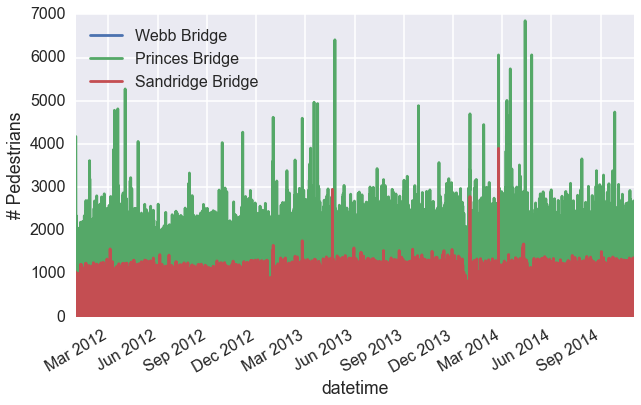

In [87]:
bridges = data[['Webb Bridge', 'Princes Bridge', 'Sandridge Bridge']]
ax = bridges.plot(figsize=(10, 6))
_ = ax.set_ylabel('# Pedestrians')

### Daily totals for pedestrians

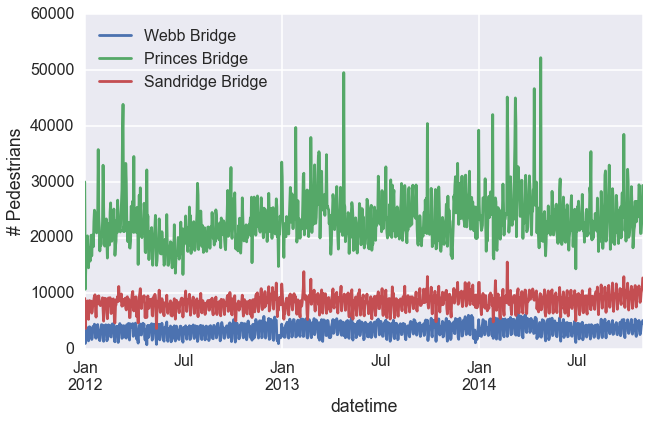

In [88]:
ax = bridges.resample('D', how='sum').plot(figsize=(10, 6))
_ = ax.set_ylabel('# Pedestrians')

###Daily average in individual sub-plots

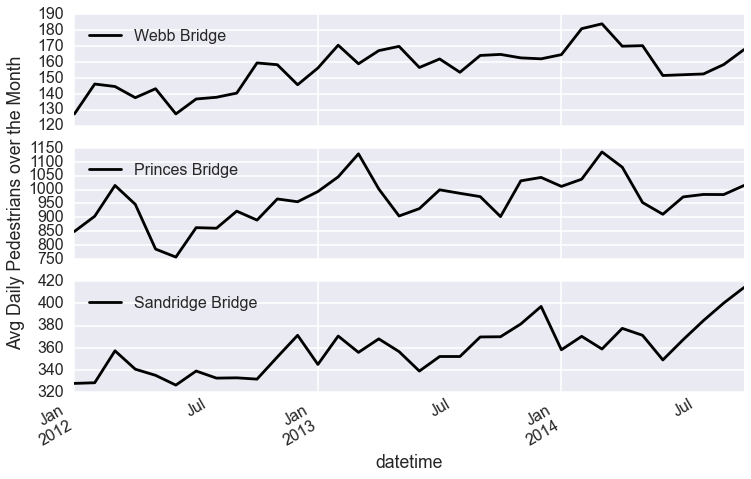

In [93]:
axs = bridges.resample('M', how='mean').plot(subplots=True, figsize=(12, 7.5))
_ = axs[1].set_ylabel('Avg Daily Pedestrians over the Month')

###Median Pedestrians per hour, Flagstaff July 2013

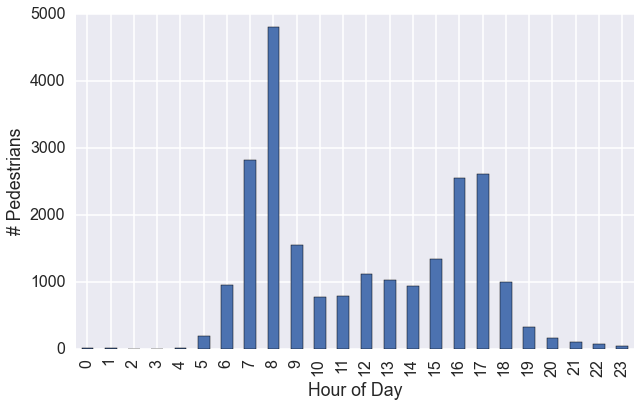

In [101]:
dt = data.ix['2014-07']['Flagstaff Station']
ax = dt.groupby(dt.index.hour).median().plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('# Pedestrians')
_ = ax.set_xlabel('Hour of Day')

### Count distribution at each location

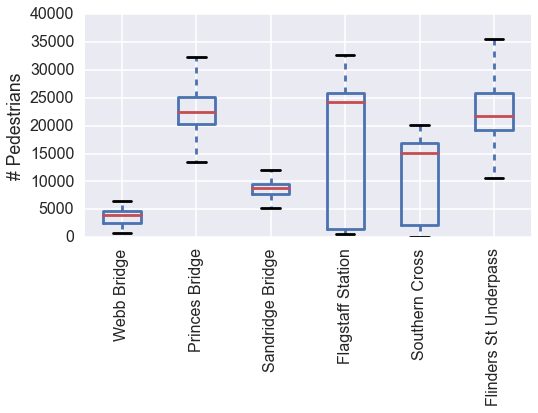

In [117]:
fig, ax = plt.subplots(1, figsize=(8, 4))
data.resample('D', how='sum').boxplot(ax=ax)
ax.set_xticklabels(data.columns, rotation=90, size=16)
ax.set_ylim(0, 40000)
_ = ax.set_ylabel('# Pedestrians')

### Scatter Plots

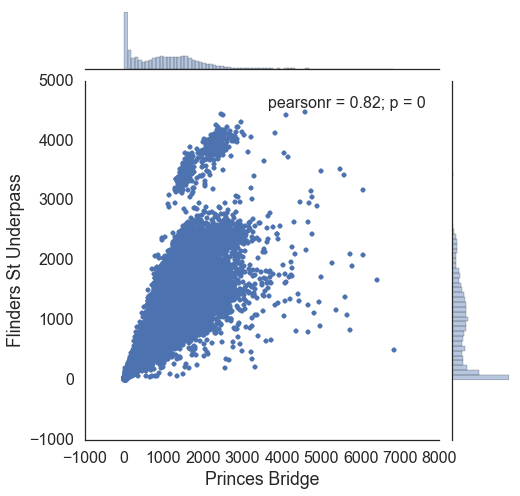

In [130]:
with sns.axes_style("white"):
    sns.jointplot('Princes Bridge', 'Flinders St Underpass', data, size=7);

In [ ]:
sns.pairplot(data, hue="species", size=2.5)

# (Machine) Learning

*And Introduction to Scikit-Learn*

* new dataset  parking
* preprocessing
    * categorical
    * text
* pipeline building
    * normalisation
* cross validation
* comparing model

In [178]:
dates = pd.DataFrame([[x.year, x.month, x.day, x.hour, x.minute, x.weekday()] for x in data.Arrival])
ml_dat = dates.join(data, how='inner')

In [194]:
ml_dat.drop(['Arrival', 'weekday', 'Weekday', 'Events', 'Duration'], axis=1)
from sklearn.feature_extraction.text import CountVectorizer
sign_features = CountVectorizer(analyzer='word').fit_transform(ml_dat.Sign)[0]


#Productionising

*And full stack development*


<b style="color:dimgray">Munging & Adhoc Analysis:</b><br>
<span style="font-size:80%">`Pandas, Scipy, Beautifulsoup`</span>

<b style="color:dimgray">Visualisation:</b><br>
<span style="font-size:80%"> `Matplotlib, seaborn, bokeh, ggplot2`  </span>

<b style="color:dimgray">Model Building:</b><br>
<span style="font-size:80%"> `Scikit-Learn, StatsModels`</span>  

<b style="color:dimgray">Serving Results or Models:</b><br>
<span style="font-size:80%"> `Flask, Django, Tornado`</span>      

<b style="color:dimgray">Testing:</b><br>
<span style="font-size:80%"> `Pytest, pyunit, nose`</span>

### Testing
<img src="images/jenga.jpg" width=300/>


###Scaling
<img src="images/spark-logo.png" width=400>

#Collaborating

*And using IPython Notebooks*

<img src="images/ipython_notebook.png" width=650>

#PS> We're hiring

* Front End Engineer
* Data Engineer
* Test Engineer
<br/><br/><br/>
<div align='right'><a>chausler@zendesk.com</a></div>